In [1]:
from source.util import utils as u
from source import metrics, plots
from source import handshake, handshake2, scargc, hs
import sys
import time
import os
import psutil
import resource
import numpy as np

In [2]:
poolsize = 300
clusters = 2
n_components = 2
step = 100

base = '/home/god/Documentos/tcc/datasets/'

list = ['1CSurr.txt']
database = {}

for i in range(0, len(list)):
    database[i] = base + list[i]

array_ep = [0.05]#, 0.10, 0.15]
array_p = [10]#,20, 30]
k = 1

memory peak:  154360
Acc:  0.5747398764085787
Macro-F1:  0.5723875719111908
MCC:  0.2971736264862986
Desvio Padrão:  0.13124001346468112
Numero de atualizações:  3637


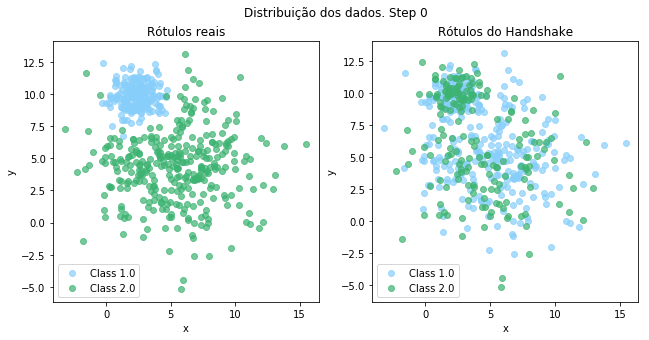

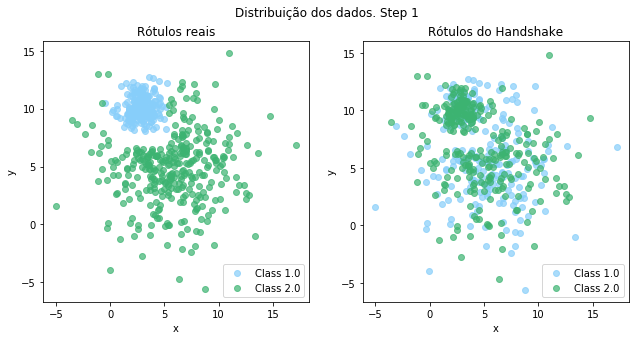

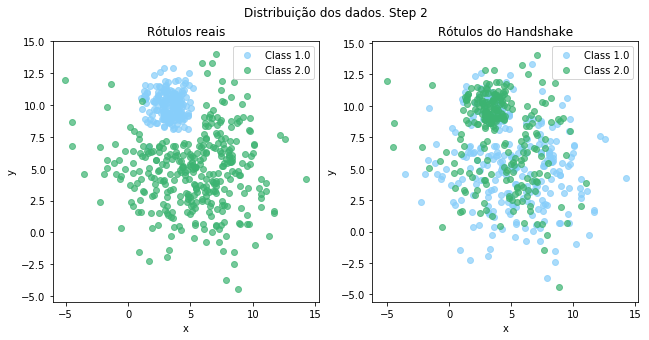

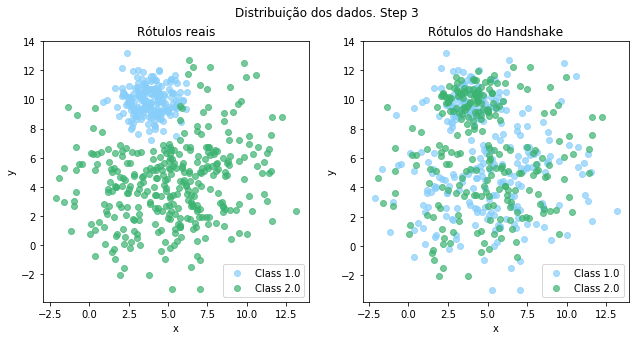

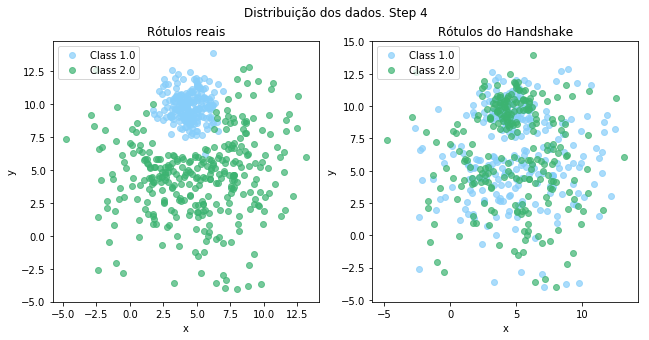

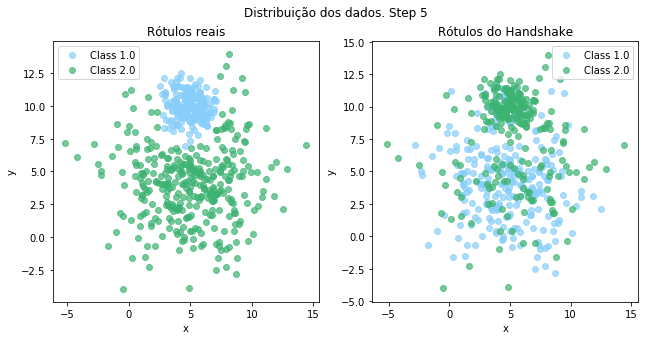

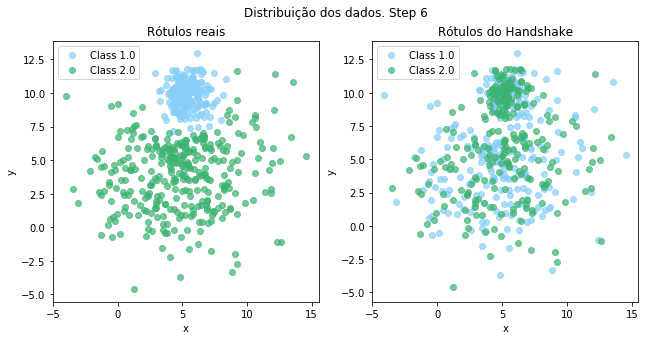

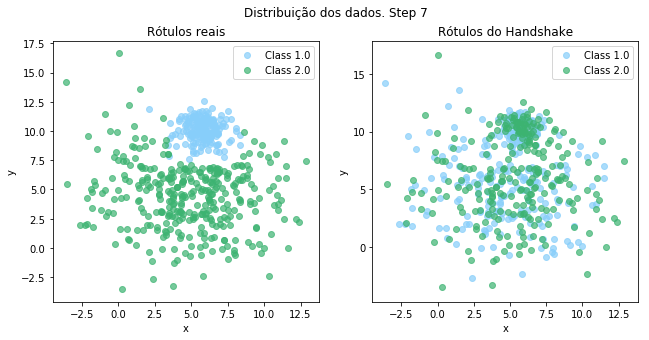

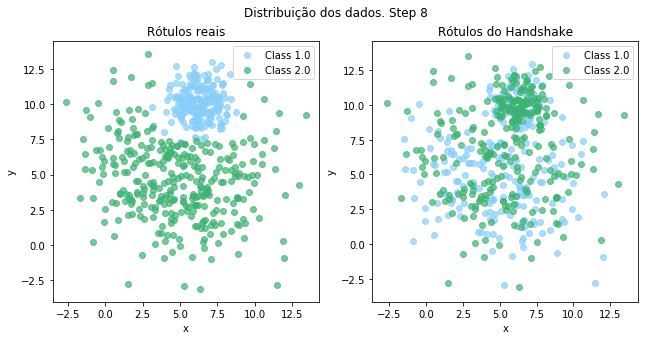

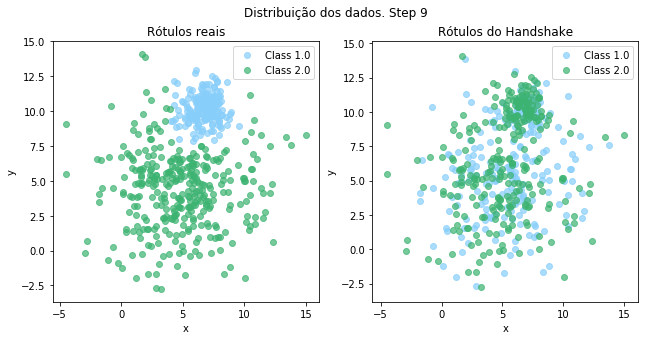

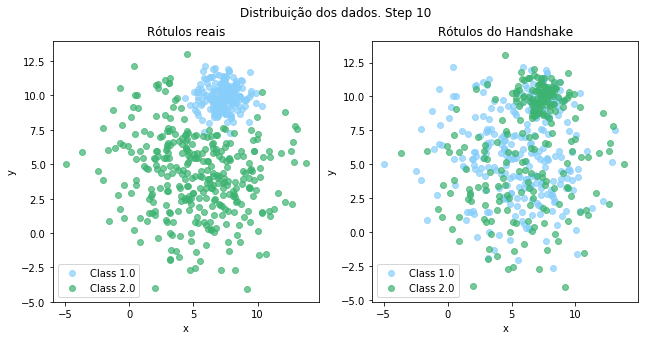

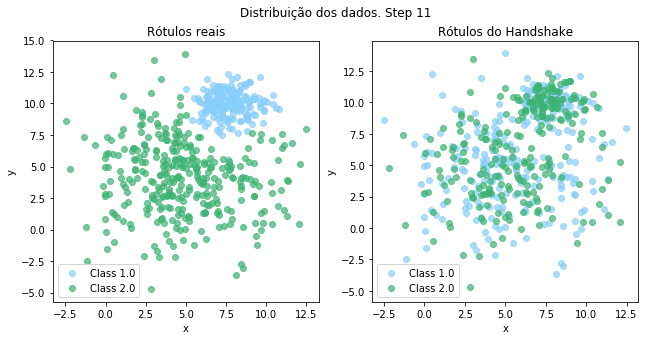

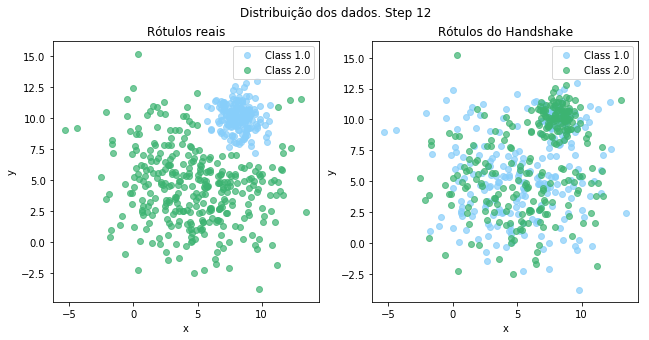

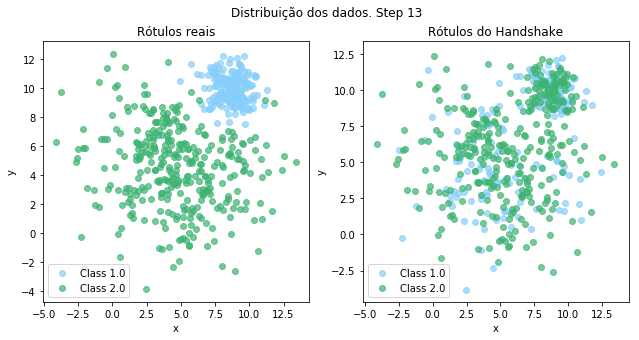

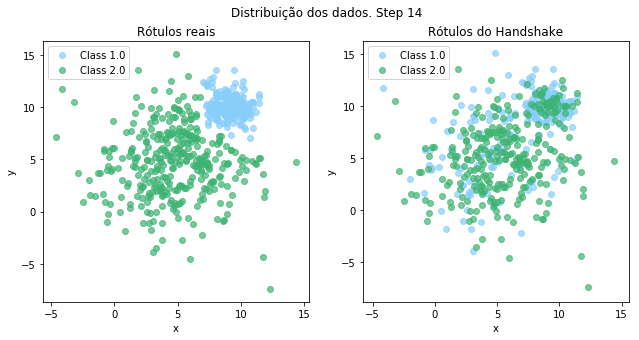

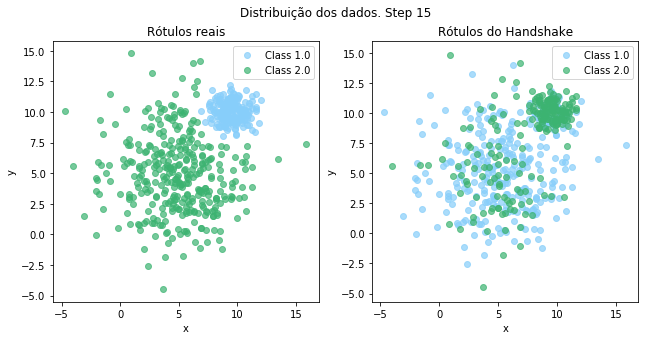

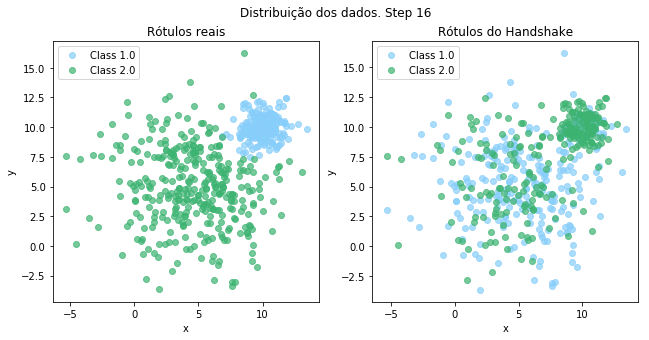

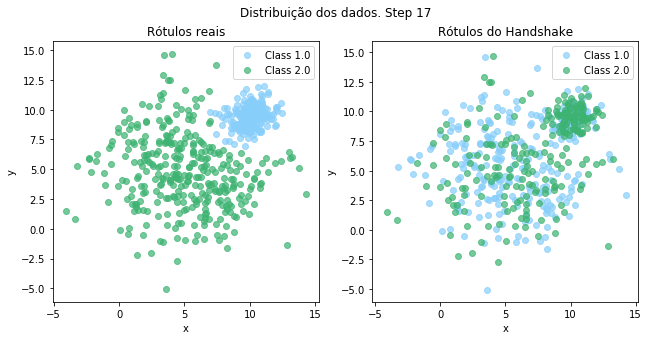

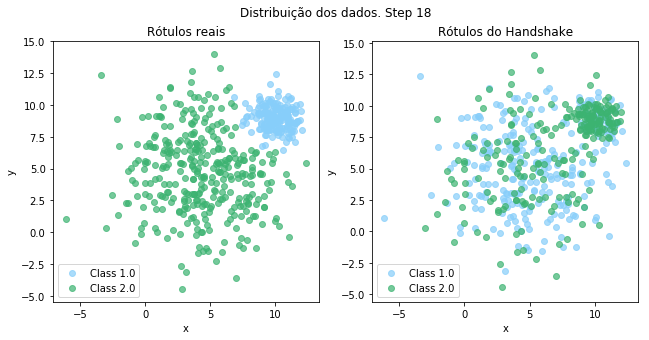

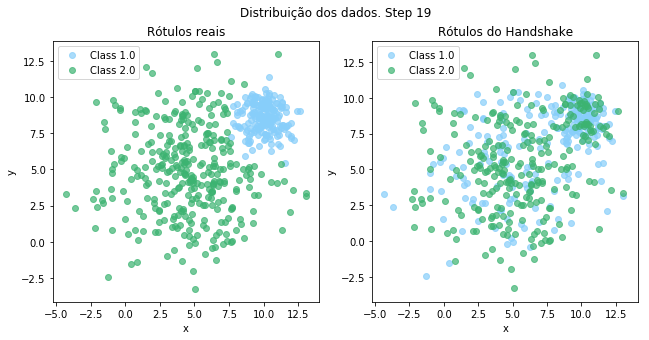

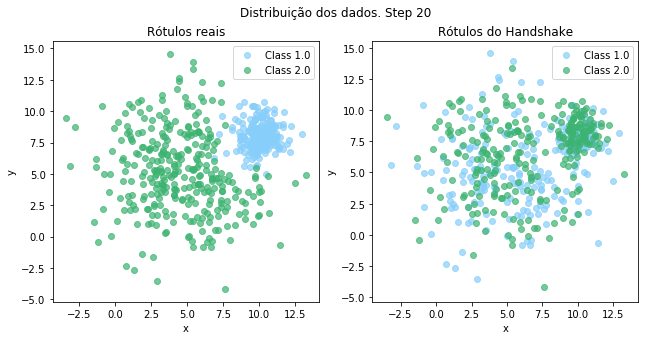

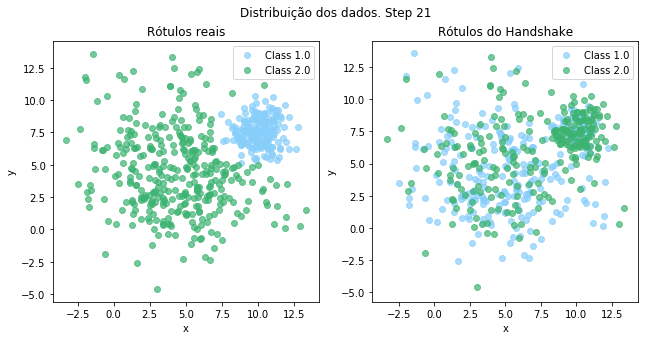

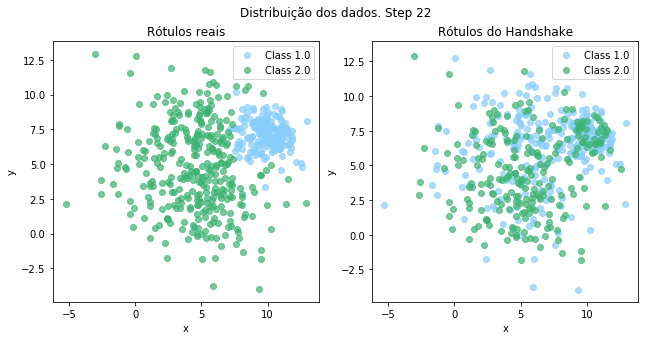

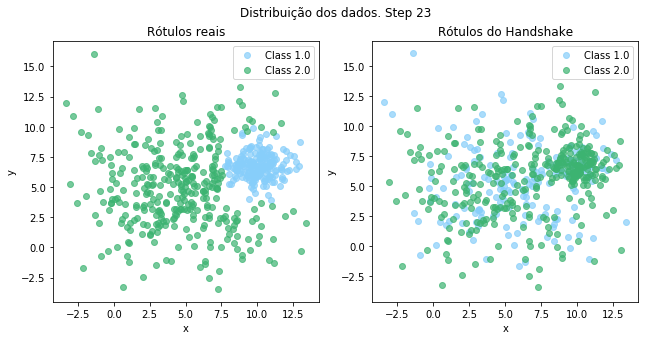

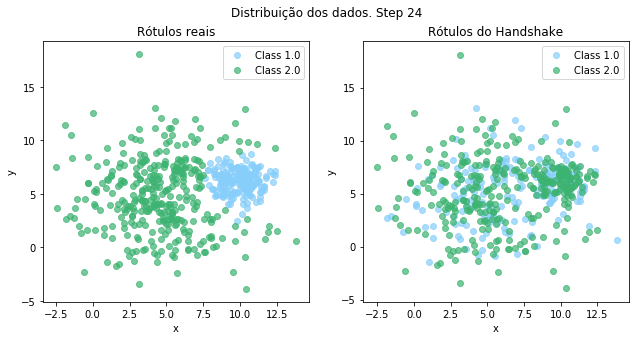

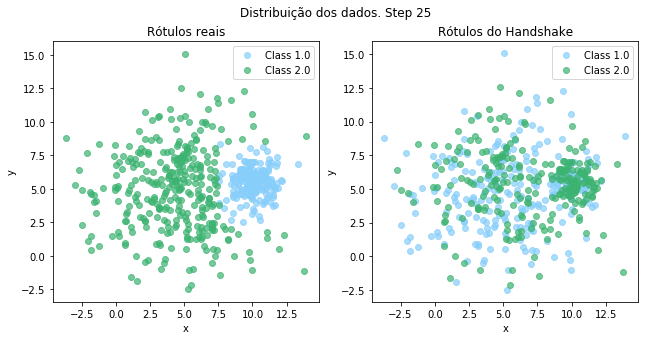

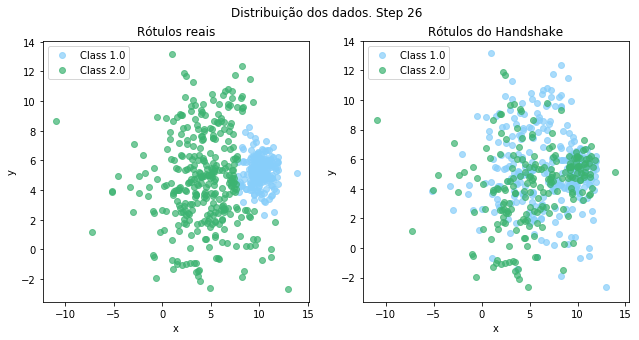

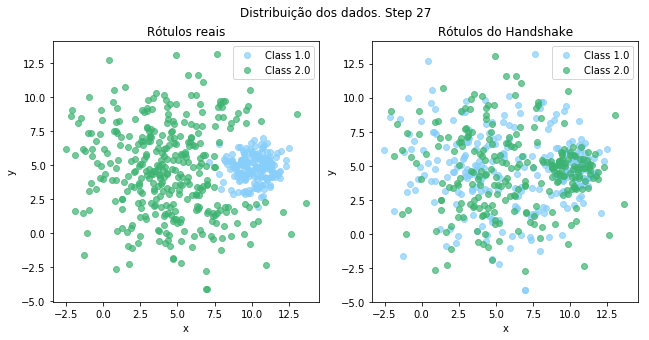

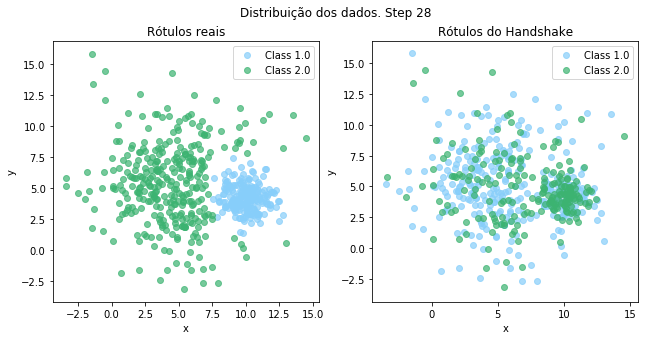

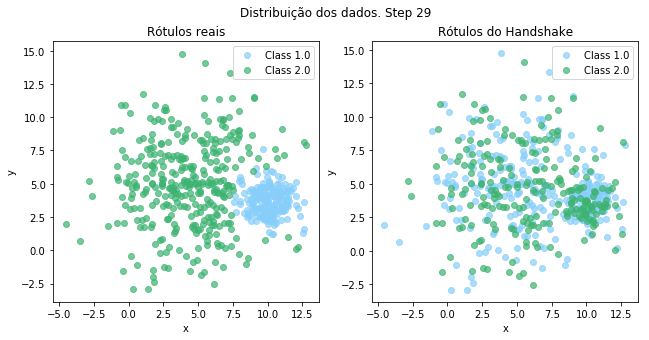

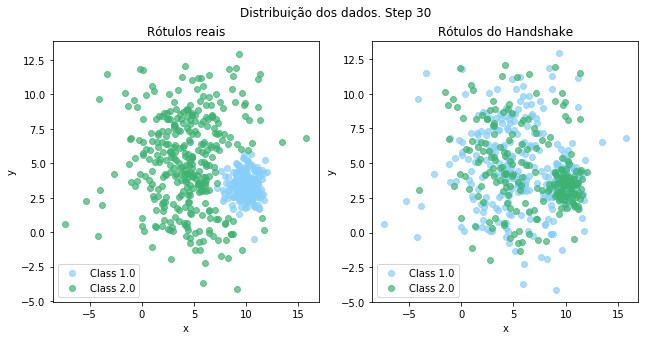

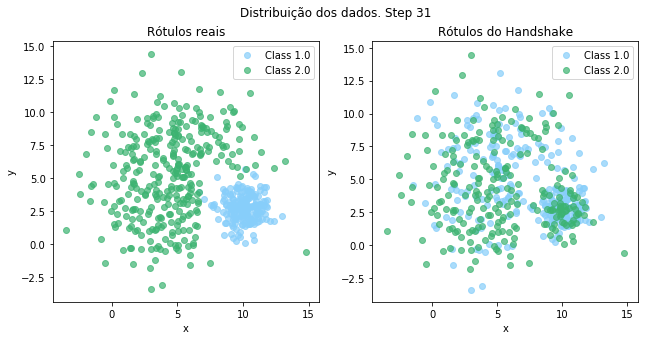

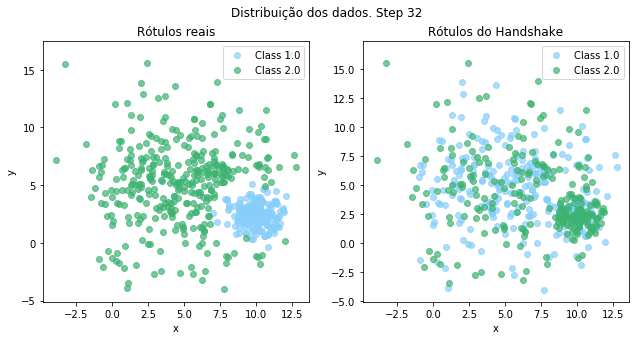

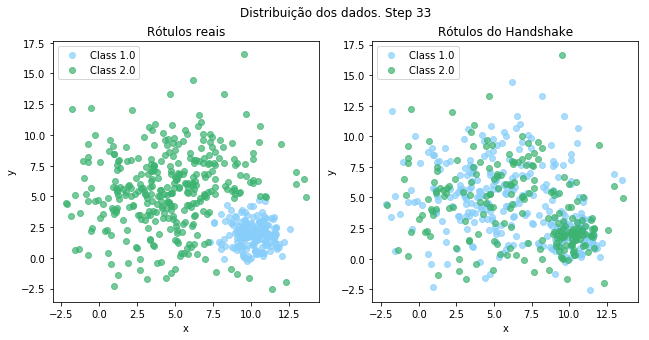

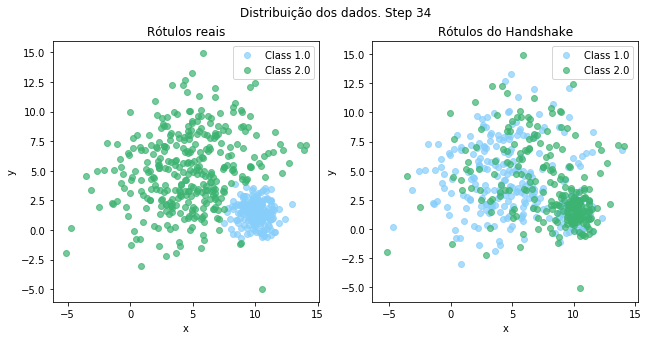

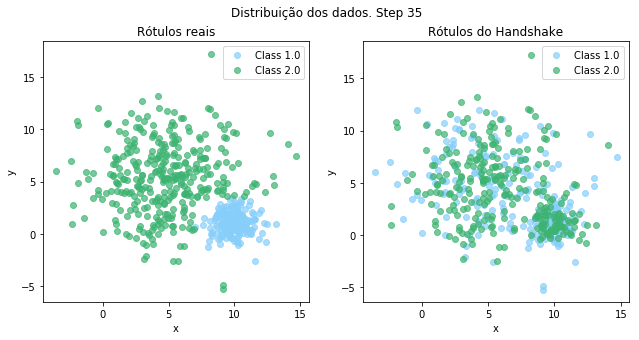

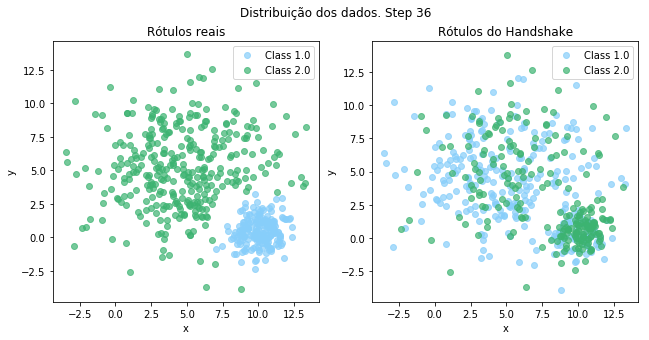

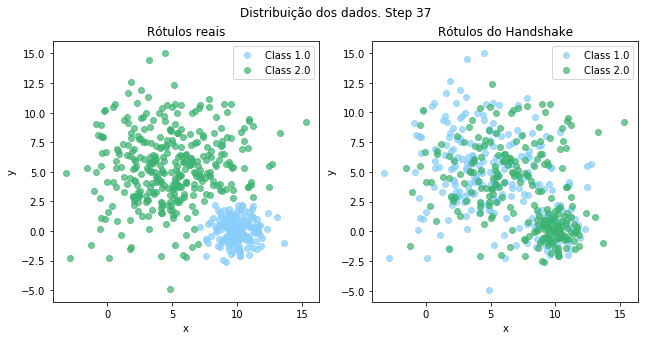

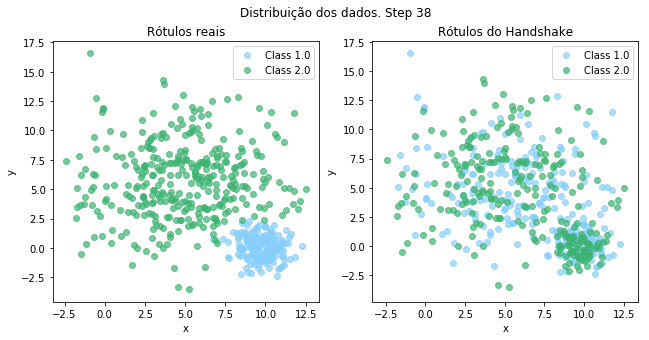

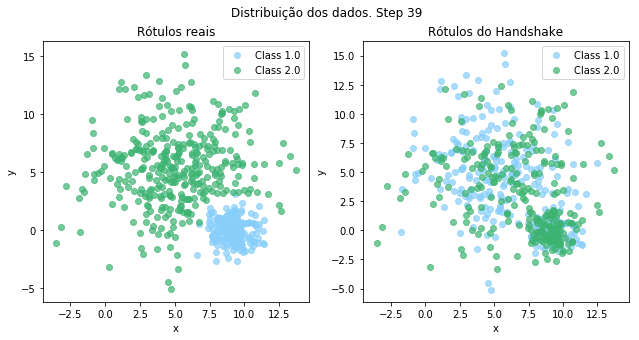

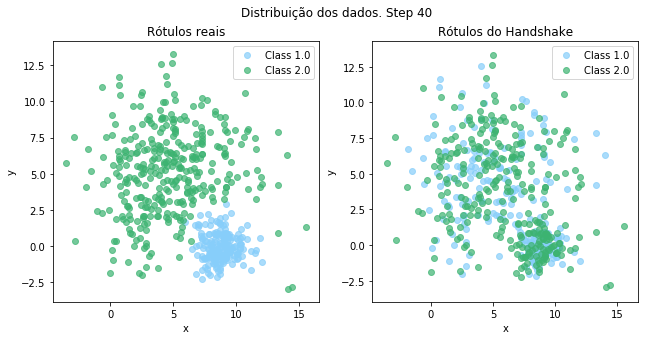

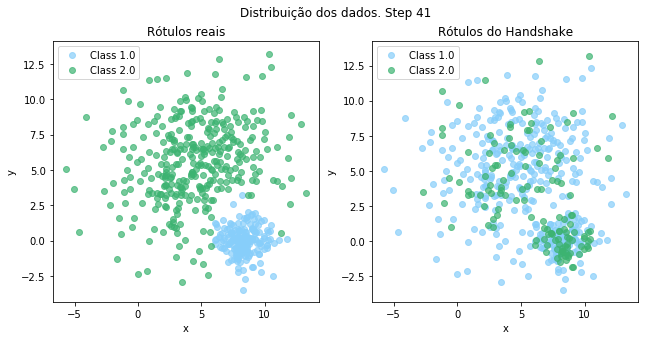

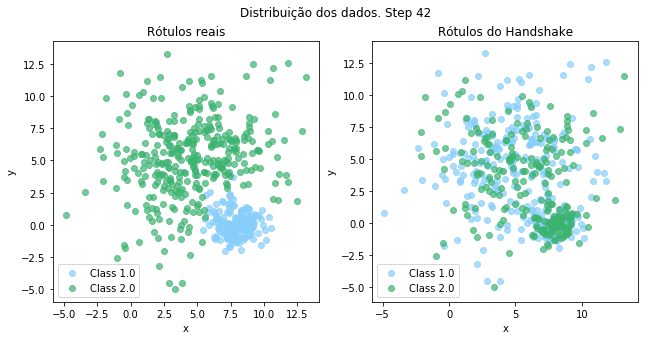

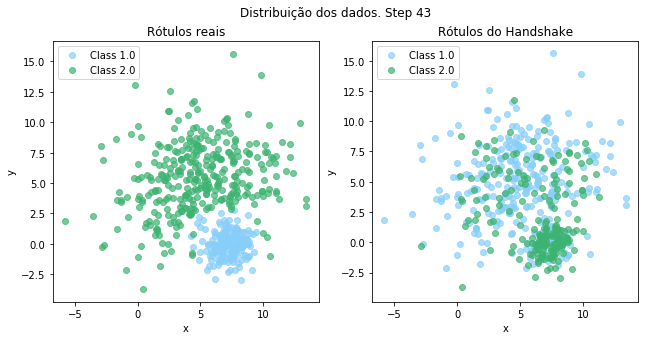

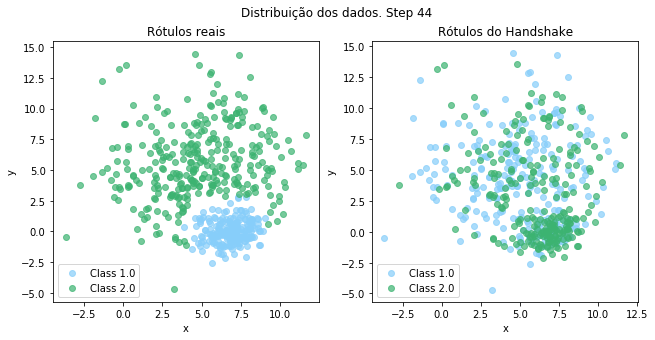

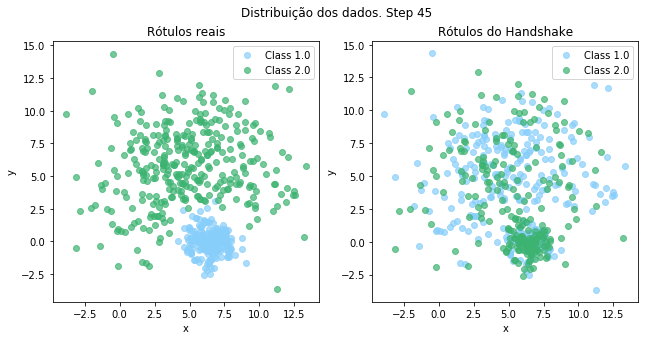

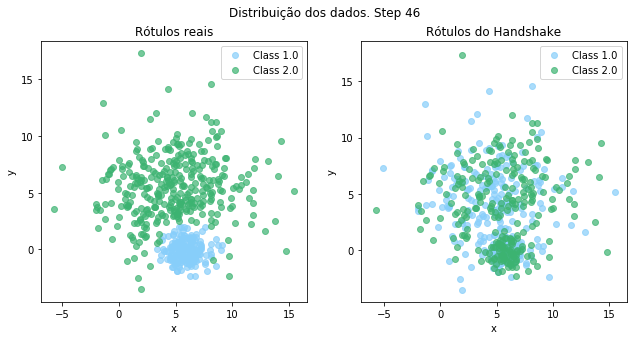

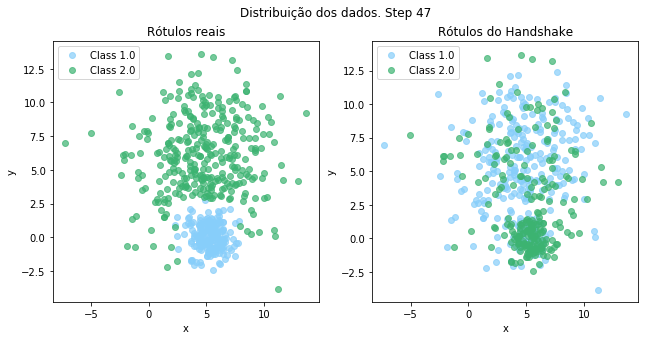

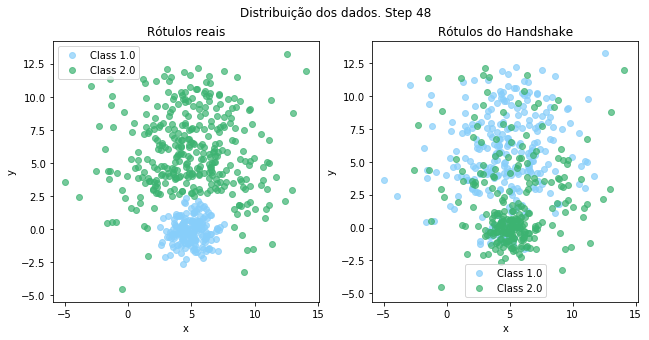

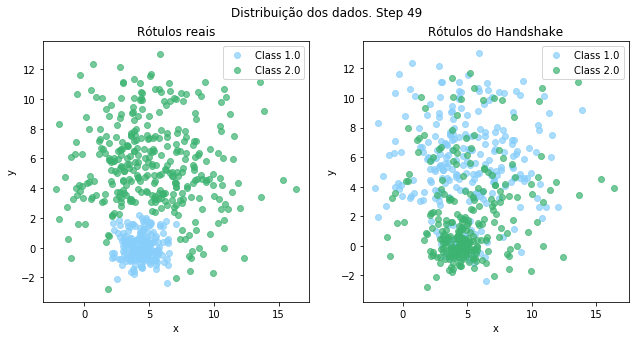

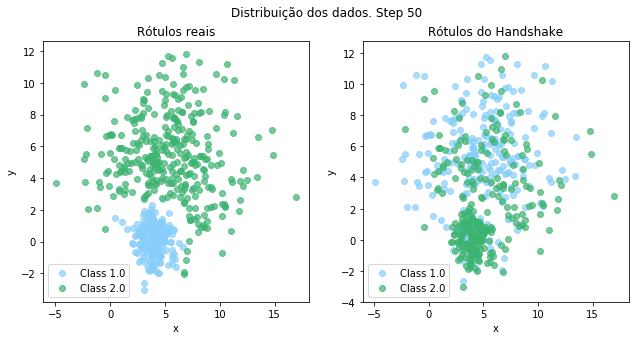

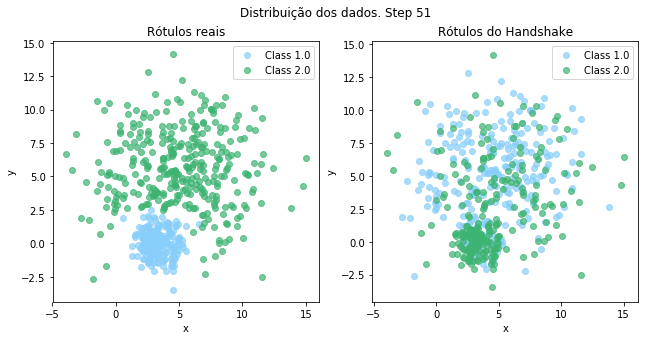

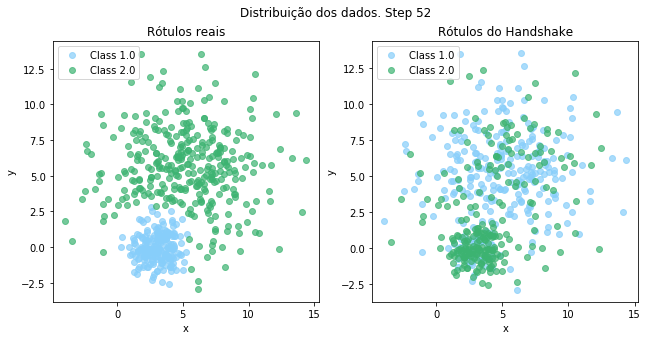

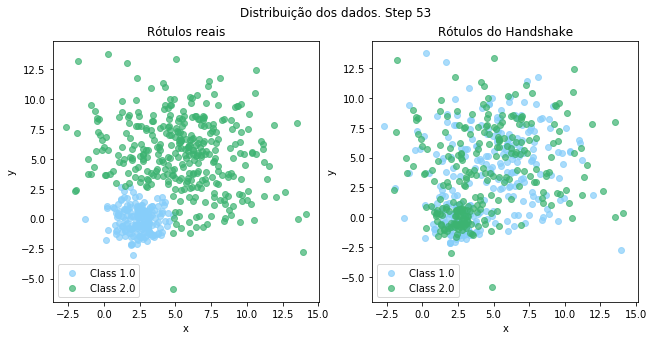

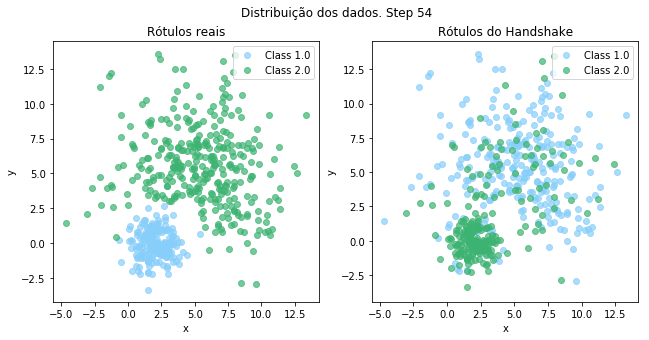

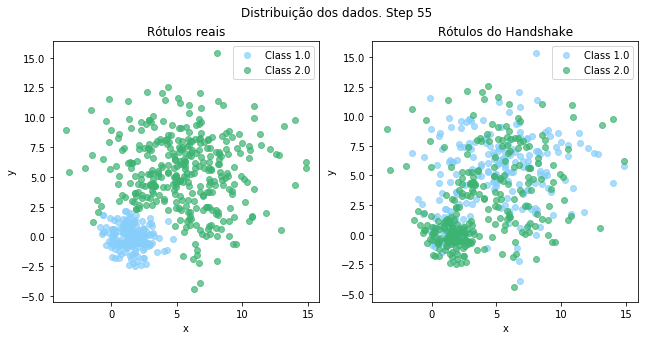

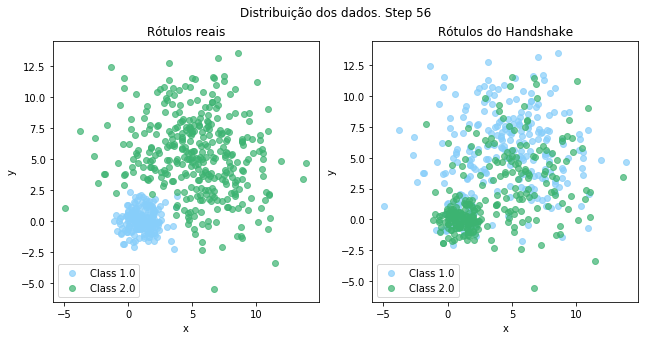

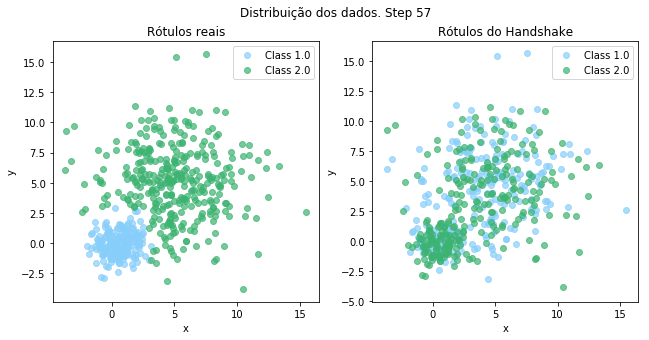

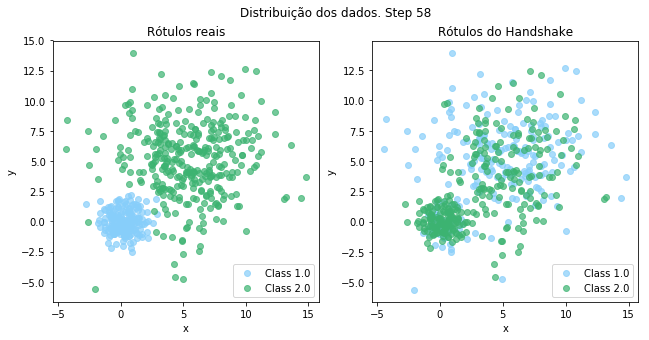

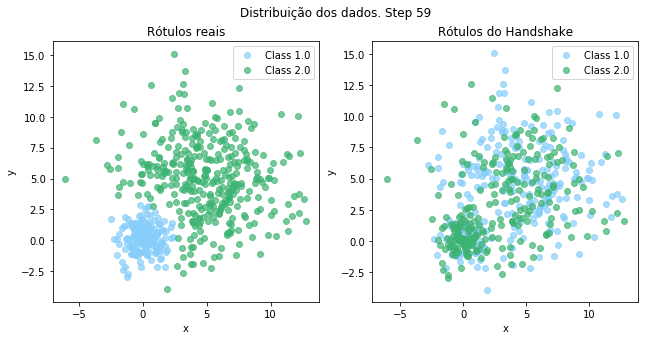

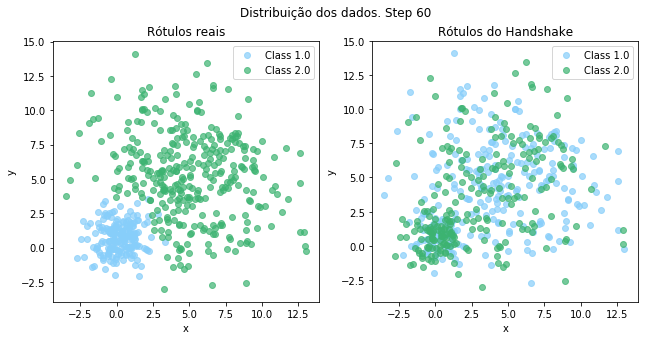

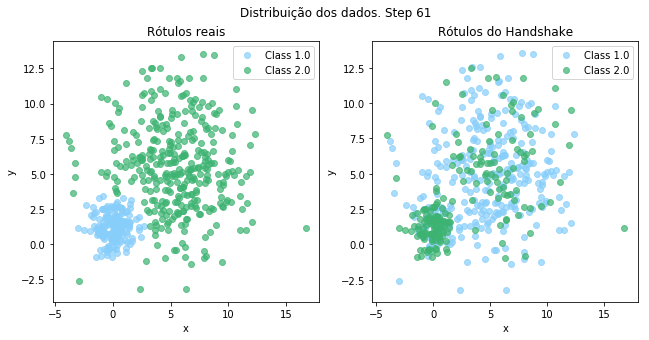

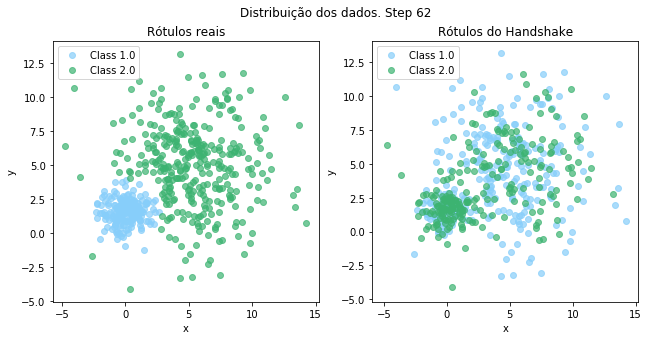

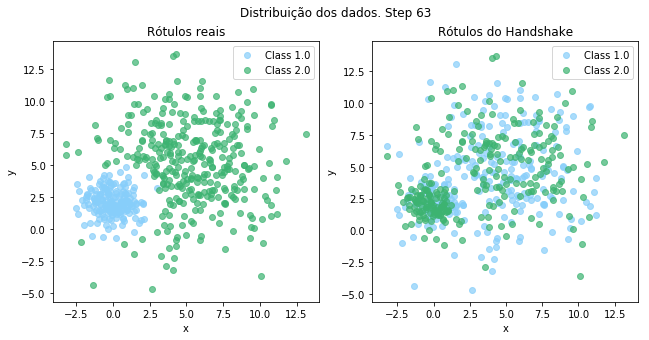

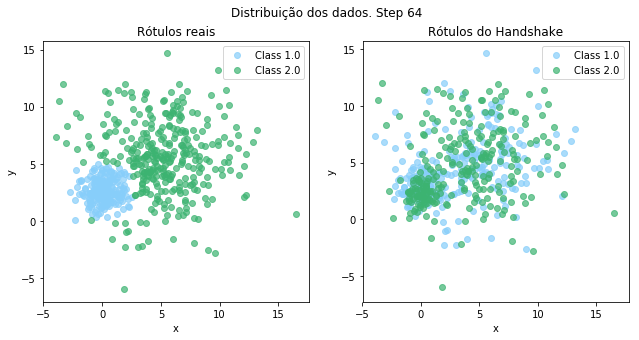

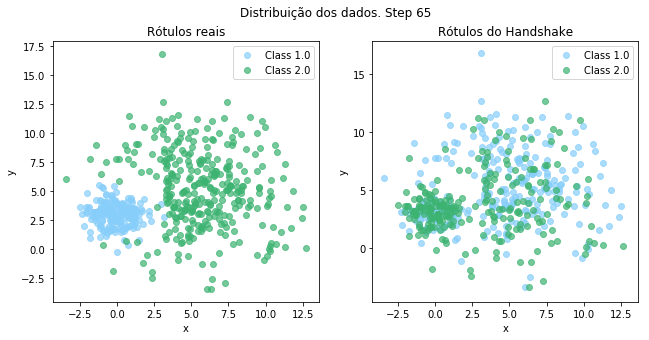

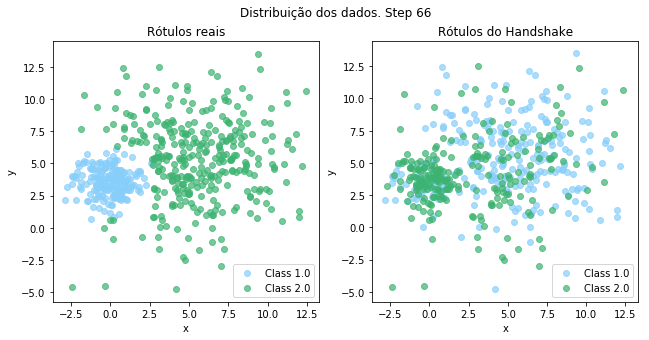

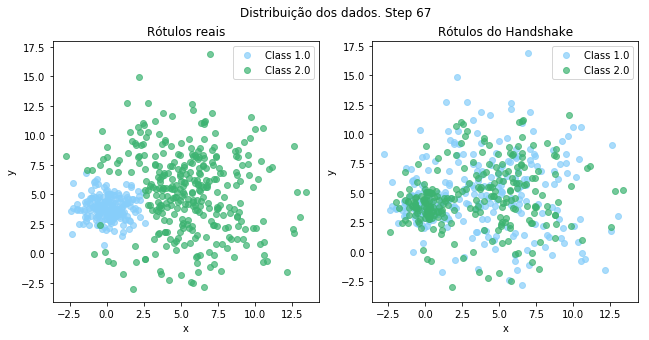

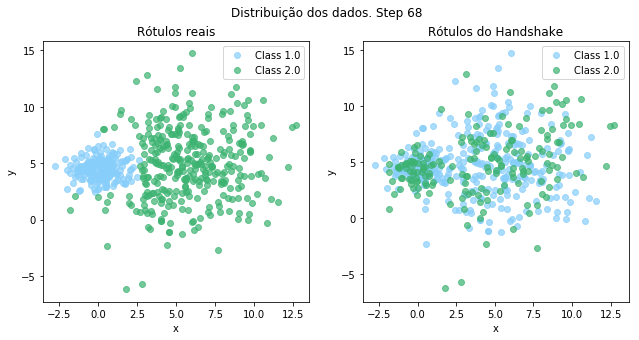

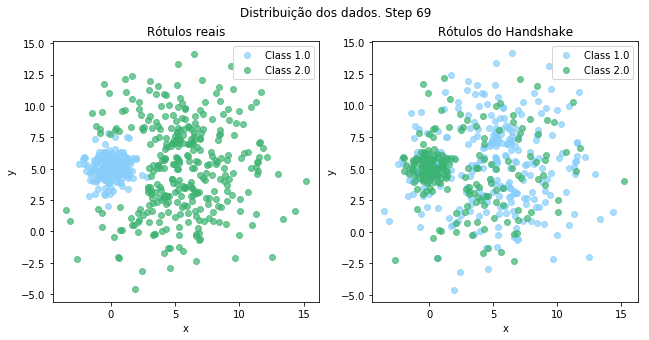

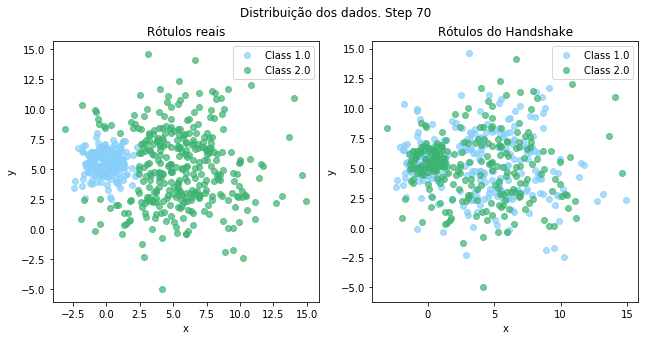

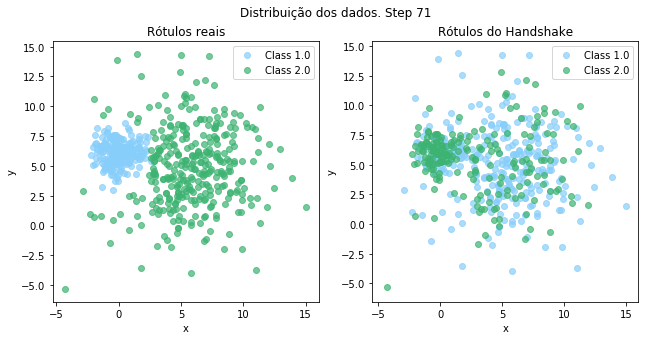

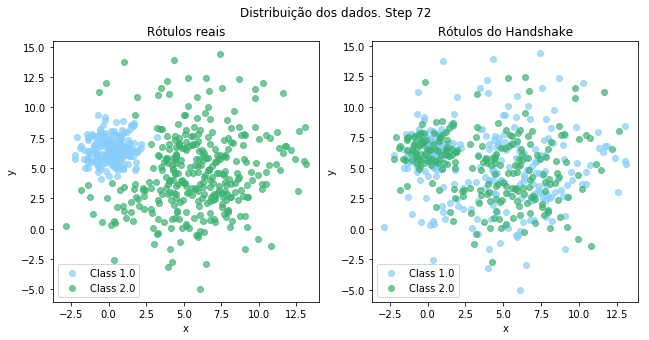

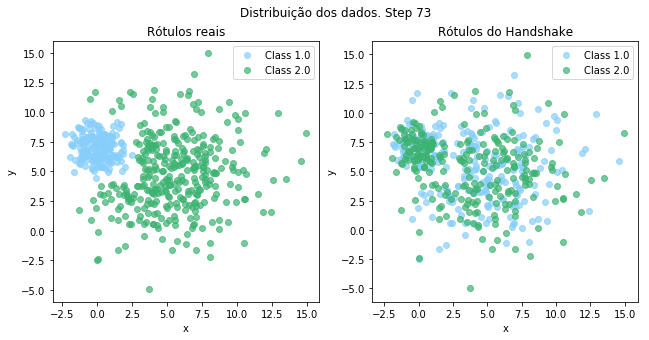

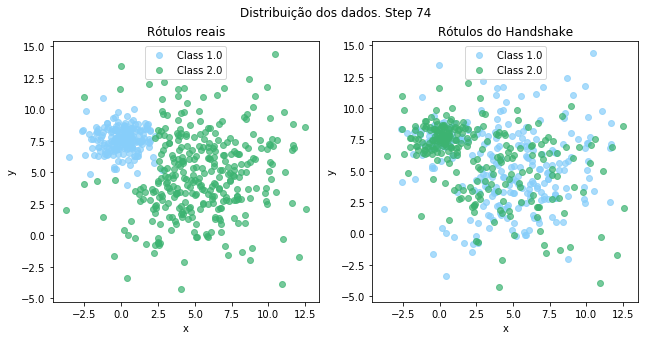

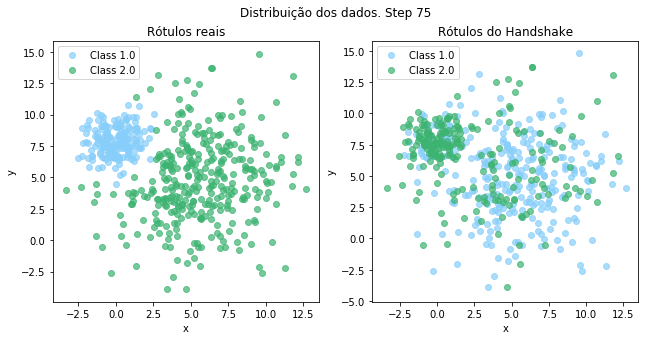

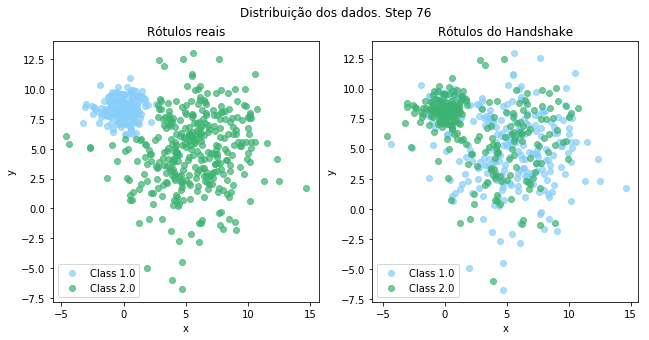

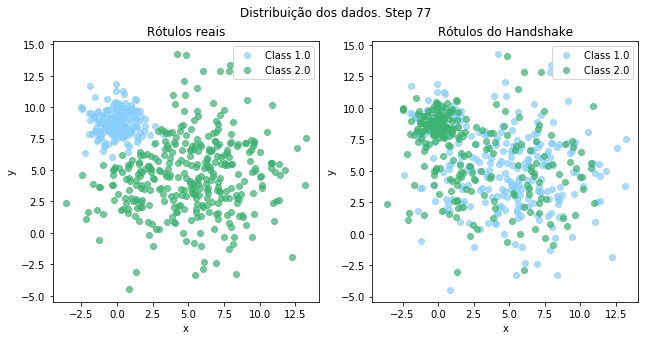

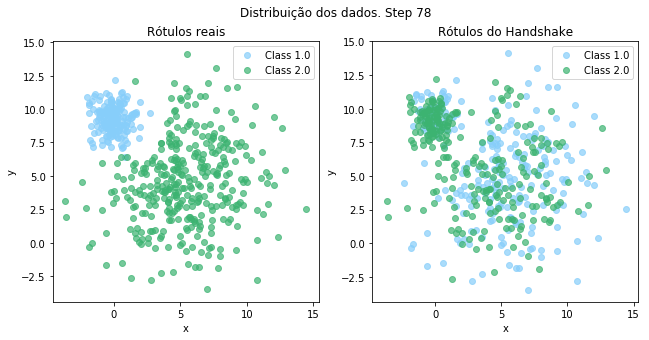

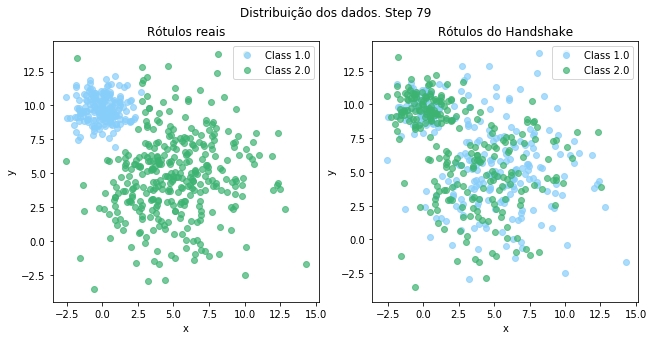

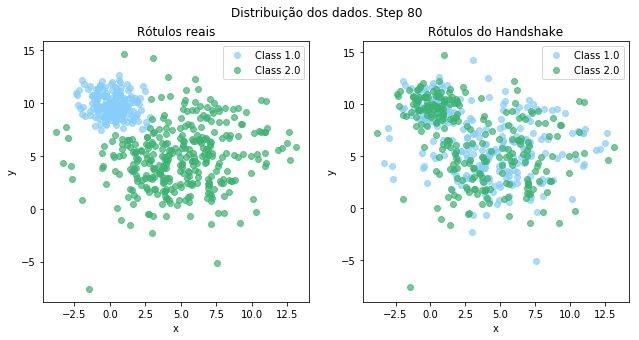

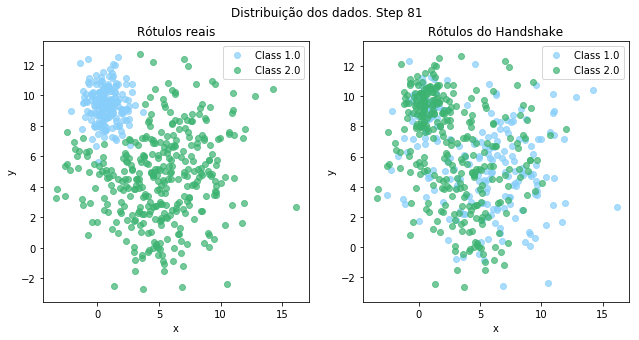

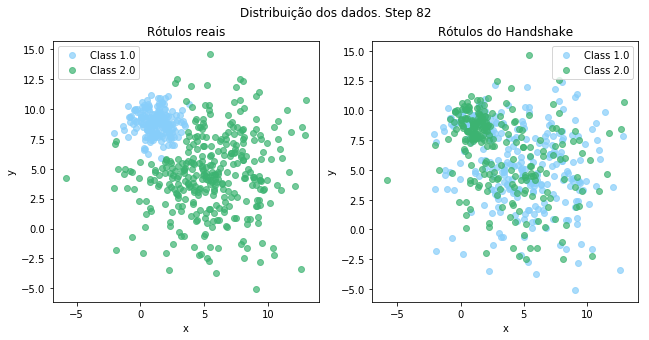

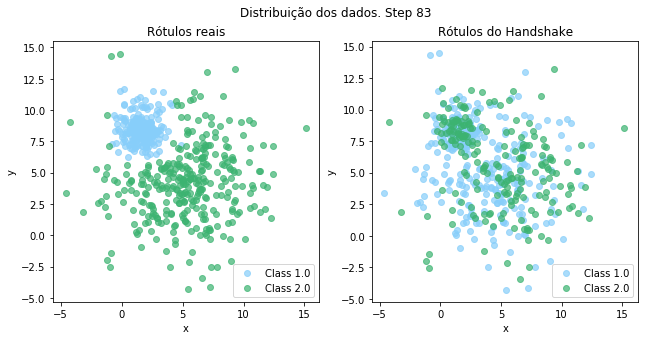

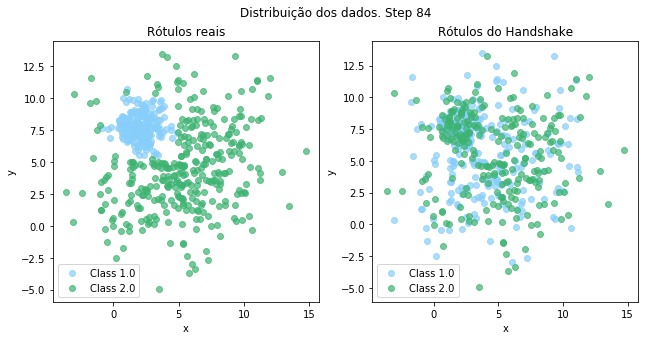

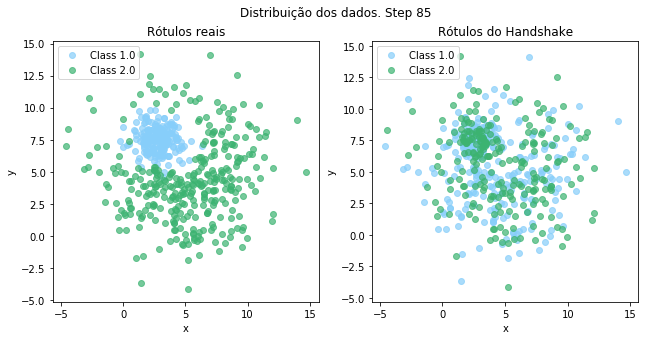

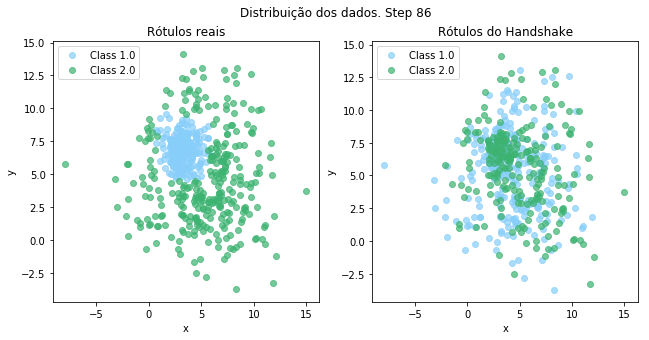

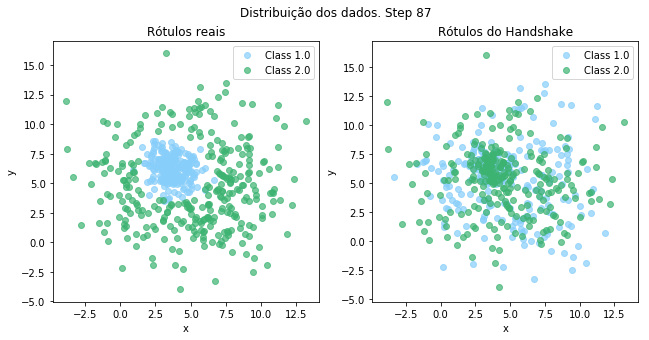

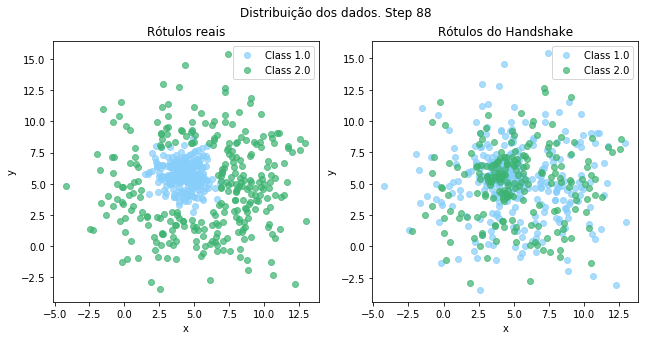

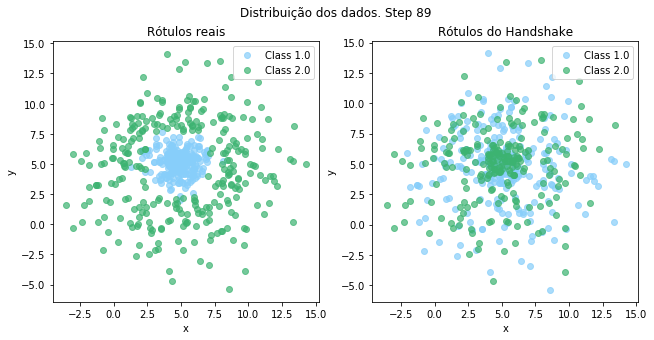

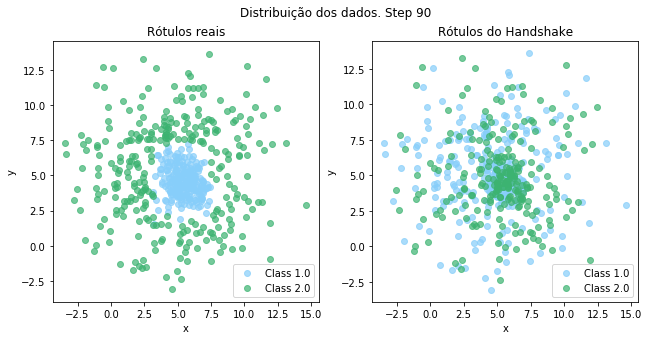

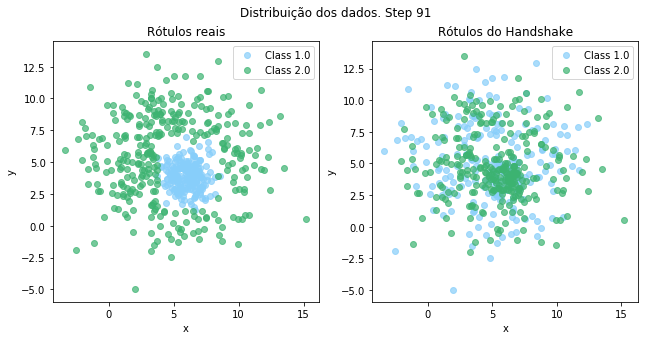

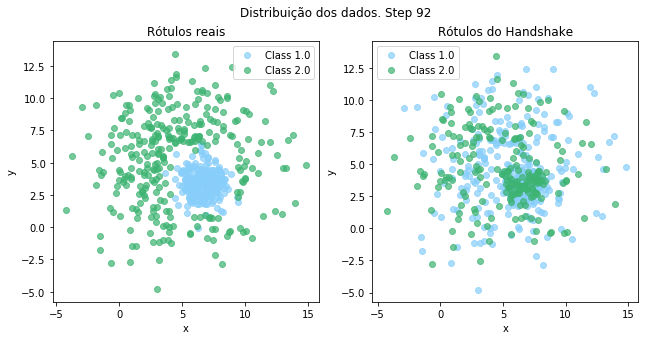

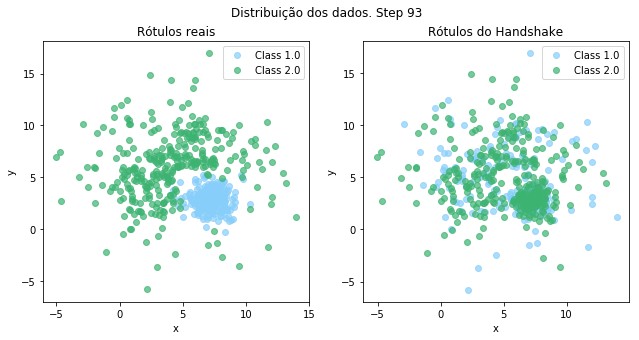

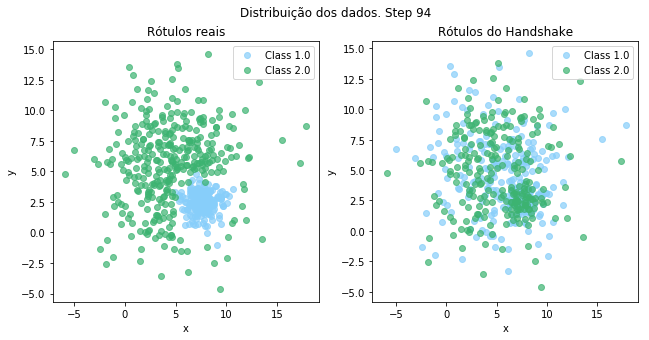

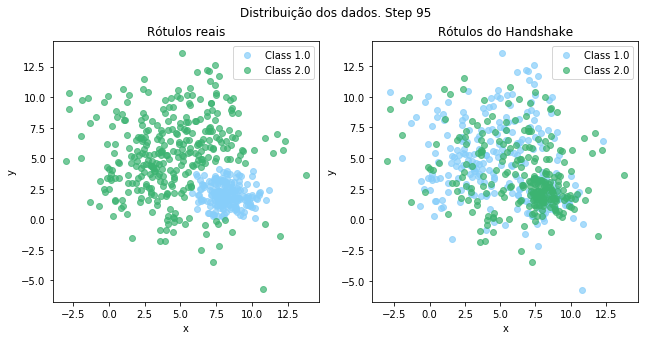

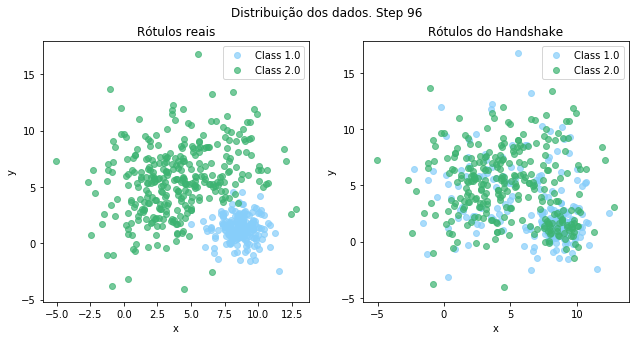

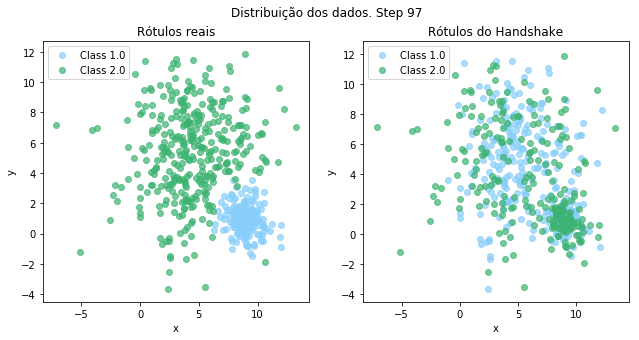

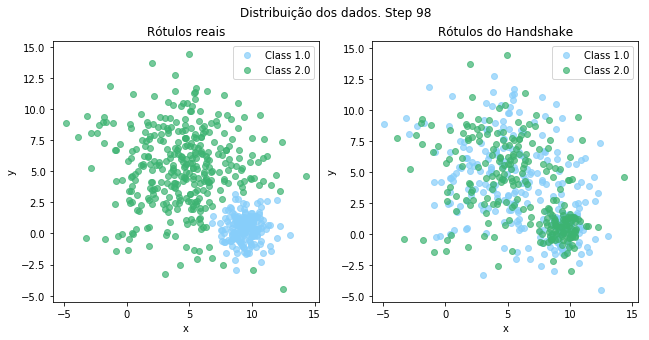

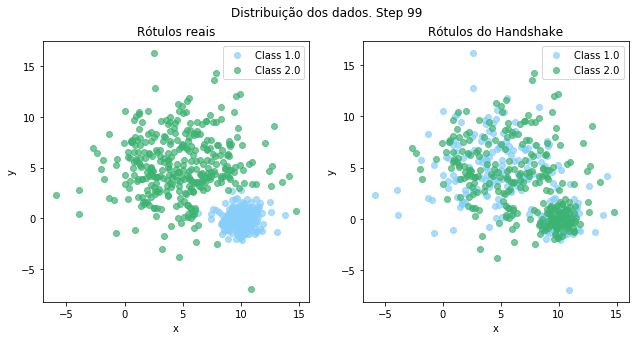

In [3]:
for key, value in database.items():
    for ep in range(0, len(array_ep)):
        for p in range(0, len(array_p)):
            adr = value
            
            dataset, data_labeled, dataset_train, l_train, stream, l_stream, n_features = u.criar_datasets(5, adr)

            start = time.time()
            predicted, updt, predicted_ = hs.handshake2(dataset, data_labeled, dataset_train, l_train, stream, l_stream, n_components, n_features, array_ep[ep], array_p[p], k)
        
            end = time.time()
            mem = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
            tempo = end - start

            acc_percent, f1_percent, mcc_percent = metrics.makeBatches(l_stream, predicted, len(stream), step)
            score, f1, mcc, std = metrics.metrics(acc_percent, l_stream, predicted, step, f1_type = 'macro')
            print('memory peak: ', mem)
            print('Acc: ', score)
            print('Macro-F1: ', f1)
            print('MCC: ', mcc)
            print('Desvio Padrão: ', std)
            print('Numero de atualizações: ', updt)
   
            pred = np.array(predicted_)
            pred = pred + 1 

            plots.plotPerBatches(stream, pred, l_stream, len(stream), step)


In [5]:
print(predicted_[0:10])
print(predicted[0:10])
print(pred[0:10])

[0, 1, 1, 0, 1, 1, 0, 1, 0, 1]
[array([1]), array([2]), array([2]), array([1]), array([2]), array([2]), array([1]), array([2]), array([1]), array([2])]
[1 2 2 1 2 2 1 2 1 2]
